1. Scrap the following CSV file updated daily online to draw the always up-to-date Epidemic curve like below for Hong Kong. Also, plot in one figure the up-to-date cumulative cases separated into Imported (Imported case plus Epidemiologically linked with imported case) and Local (all the rest) against the Date of onset (skip Asymptomatic, etc.) like the next figure. Bonus points will be given for any meaningful extrapolation to predict the future imported cases. Furthermore, draw a histogram of the Deceased cases against Age in bins of 10 years old and the death rate % within each of the age groups (i.e. deaths÷cases in the age group only) in the same figure. Lastly, display the up-to-date Table 1 like below for the last Report day using `pandas`.  
http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv

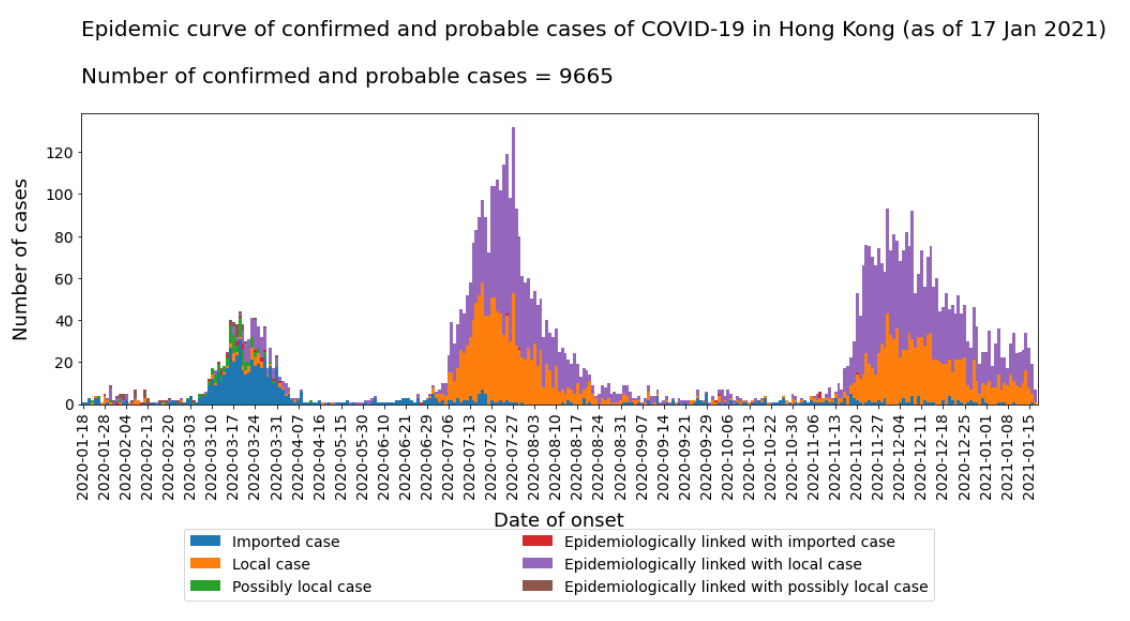

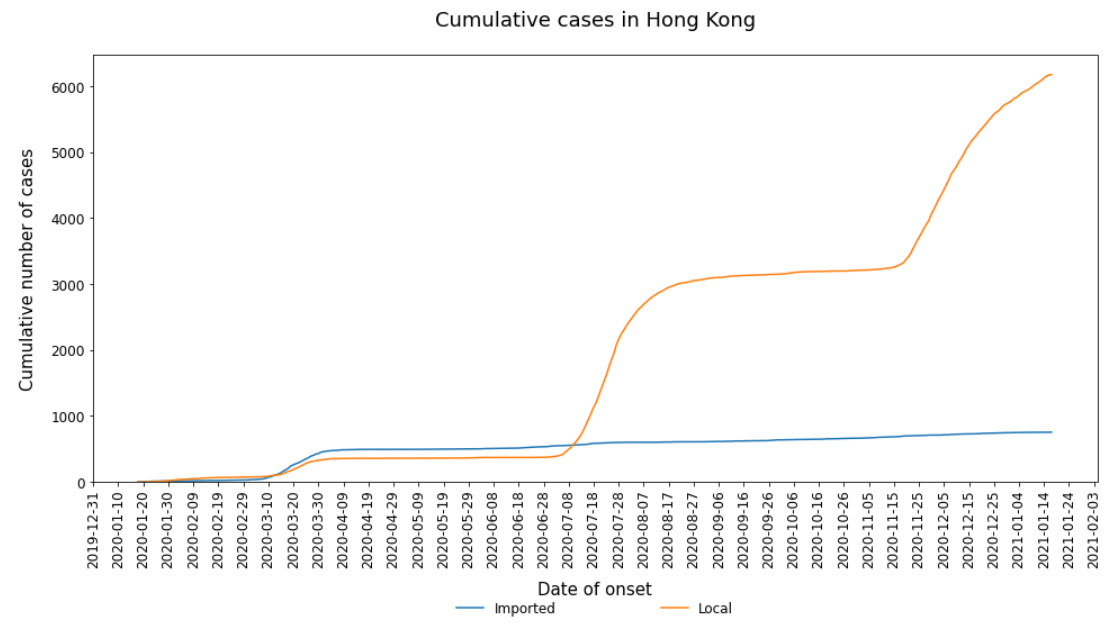

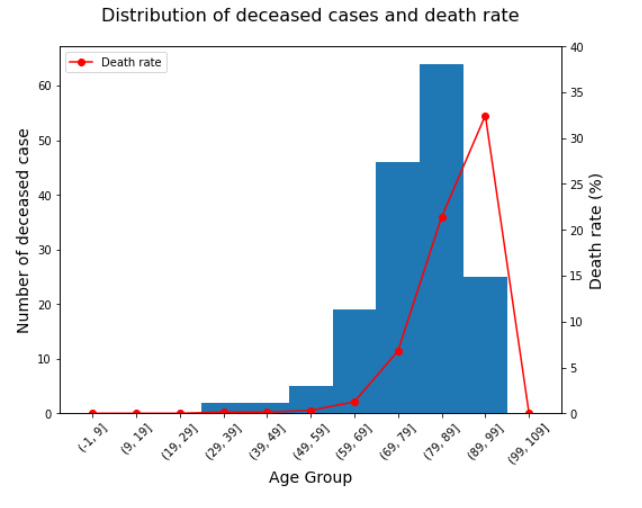

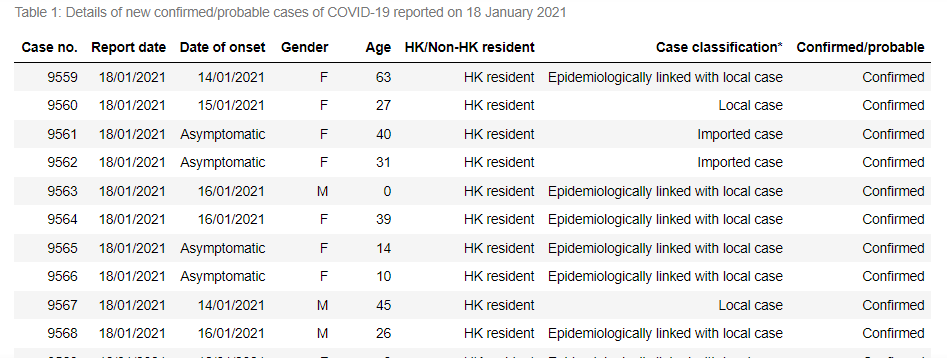

In [1]:
# Your Code Here
#read the csv document and the date
from io import StringIO
import requests
import pandas as pd
from datetime import datetime
r = requests.get("http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv")
df_origin = pd.read_csv(StringIO(r.text))
df =df_origin.copy()
d = datetime.today()

In [3]:
#clean data to make sure that each record has the definite date of onset
choose = [1 if "20" in str(date) else 0 for date in df["Date of onset"]]
df["choose"] = choose
df = df[df["choose"] == True]
transform = ["-".join(date.split('/')[::-1]) for date in df["Date of onset"]]
df["Date of onset"] = transform
df = df[df["choose"] == 1]
df.sort_values(by = ["Date of onset"],inplace = True)

In [4]:
#define the counting function to calculate the number of cases in each day
def counting(z):
    a= z.copy()
    a.sort_values(by = ["Date of onset"],inplace = True)
    a.index = [i for i in range(len(a))]
    b = a.value_counts(a["Date of onset"])
    a.set_index("Date of onset",inplace = True)
    a["count"] = b
    return a

In [5]:
#divide all the records into different categories
Local_case = counting(df[df["Case classification*"] == "Local case"])
Imported_case = counting(df[df["Case classification*"] == "Imported case"])
Poss_local_case = counting(df[df["Case classification*"] == "Possibly local case"])
Epid_linked_with_imported_case = counting(df[df["Case classification*"] == "Epidemiologically linked with imported case"])
Epid_linked_with_local_case = counting(df[df["Case classification*"] == "Epidemiologically linked with local case"])
Epid_linked_with_poss_local_case = counting(df[df["Case classification*"] == "Epidemiologically linked with possibly local case"])

#### (1)the always up-to-date Epidemic curve

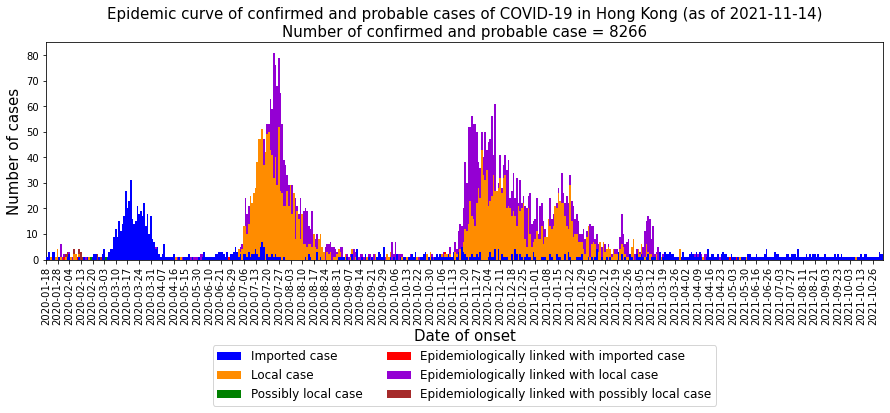

In [6]:
#plot part
import matplotlib.pyplot as plt 
import numpy as np

#record all the different date of onset
X = list(set(df["Date of onset"]))
X.sort()
#show the xaixs every 7 days
x = [X[i] for i in range(len(X)) if i%7==0]

fig,ax = plt.subplots(figsize = (15,4))
#first we create a zero bar to contain all the different date so as to fix the coordinate
plt.bar(X,[0]*len(X),zorder = 0)
#plot bar charts for different categories
plt.bar(Imported_case.index,Imported_case["count"],width=1,color = "b",zorder = 20,label = "Imported case")
plt.bar(Local_case.index,Local_case["count"],width=1,color = "darkorange",zorder = 10,label = "Local case")
plt.bar(Poss_local_case.index,Poss_local_case["count"],width=1,color = "g",zorder = 8,label = "Possibly local case")
plt.bar(Epid_linked_with_imported_case.index,Epid_linked_with_imported_case["count"],width=1,color = "r",zorder = 6,label = "Epidemiologically linked with imported case")
plt.bar(Epid_linked_with_local_case.index,Epid_linked_with_local_case["count"],width=1,color = "darkviolet",zorder =4,label = "Epidemiologically linked with local case")
plt.bar(Epid_linked_with_poss_local_case.index,Epid_linked_with_poss_local_case["count"],width=1,color = "brown",zorder =2,label = "Epidemiologically linked with possibly local case")
plt.title(f"Epidemic curve of confirmed and probable cases of COVID-19 in Hong Kong (as of {datetime.strftime(d,'%Y-%m-%d')})\nNumber of confirmed and probable case = {len(df)}",fontsize = 15)
ax.set_xlabel("Date of onset",fontsize =15)
ax.set_ylabel("Number of cases",fontsize = 15)
plt.legend(loc = "lower center",bbox_to_anchor=(0.5,-0.7),ncol=2,prop = {"size":12})
ax.set_xticks(x)
ax.set_xlim(X[0],X[-1])
plt.xticks(rotation = 90)
plt.show()


#### (2)the up-to-date cumulative cases

In [7]:
#define a function to calculate the number of cumulative cases in each time 
def cumulate(z):
    a = z.copy()
    a = a[a.index.duplicated(keep="first")==False]
    cum = [sum(a["count"][:i+1]) for i in range(len(a["count"]))]
    a["cum"] = cum
    return a

In [8]:
#divide all records into import and local parts and cumulate the number
Import = counting(pd.concat([df[df["Case classification*"] == "Imported case"],
                    df[df["Case classification*"] == "Epidemiologically linked with imported case"]]))
Local = counting(pd.concat([df[df["Case classification*"] == "Local case"],
                           df[df["Case classification*"] == "Possibly local case"],
                           df[df["Case classification*"] == "Epidemiologically linked with local case"],
                           df[df["Case classification*"] == "Epidemiologically linked with possibly local case"]]))
Import = cumulate(Import)
Local = cumulate(Local)

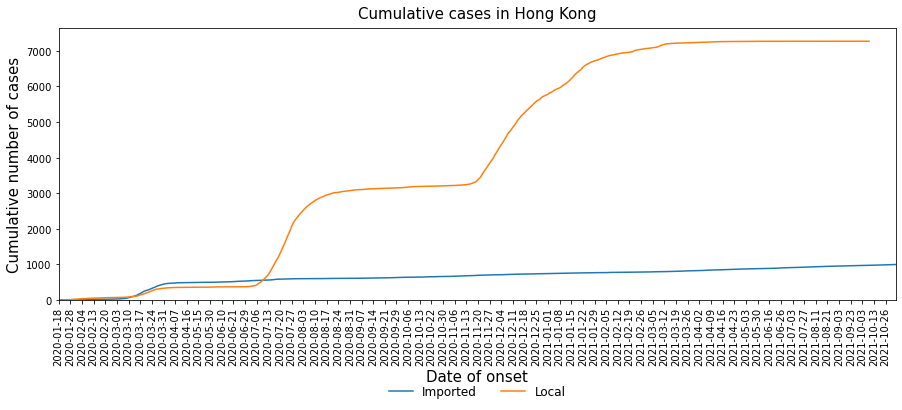

In [9]:
fig,ax = plt.subplots(figsize = (15,5))
#first we create a zero plot to contain all the different date so as to fix the coordinate
ax.plot(X,[0]*len(X),zorder = 0,color = "white")
#plot lines for different categories

ax.plot(Import.index,Import["cum"],label = "Imported")
ax.plot(Local.index,Local["cum"],label = "Local")
plt.title("Cumulative cases in Hong Kong",fontsize = 15,pad=10)
ax.set_xlabel("Date of onset",fontsize =15)
ax.set_ylabel("Cumulative number of cases",fontsize = 15)
plt.legend(loc = "lower center",bbox_to_anchor=(0.5,-0.4),frameon = False,ncol = 2,prop = {"size":12})
ax.set_xticks(x)
ax.set_xlim(X[0],X[-1])
ax.set_ylim(0)
plt.xticks(rotation = 90)
plt.show()

**From the two pictures we get above, we can clearly find that the number of new imported cases per day keeps small (only several cases) for more than 6 months. So, we reasonably extrapolate that the daily imported cases in future will still keep small, which may benefit from experience the HK government got from the first outbreak imported cases.**

#### (3)the histogram of the Deceased cases against Age in bins of 10 years old and the death rate % within each of the age groups

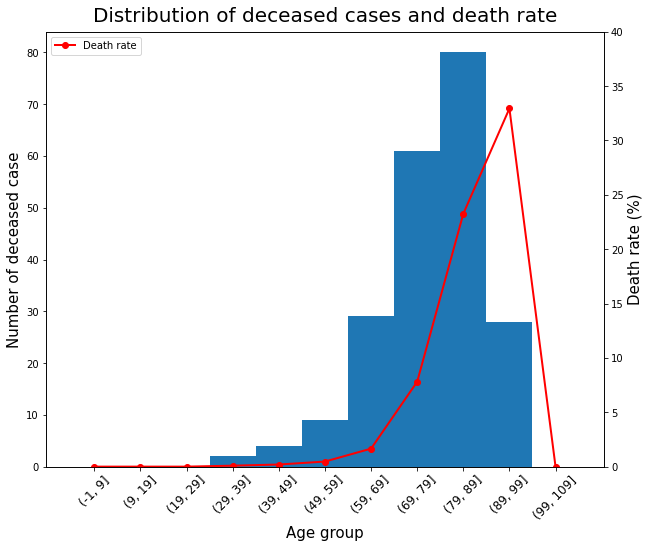

In [20]:
#set the age group
bins = [i for i in range(-1,110) if i%10==9]
#clean the cases whose age is "nan" and choose the deceased cases
Deceased = df_origin[df_origin["Hospitalised/Discharged/Deceased"]=="Deceased"]
All_age_group = pd.cut(df_origin[df_origin["Age"]<200]["Age"],bins)
All_age_count = pd.value_counts(All_age_group).sort_index()
Age_Group = pd.cut(Deceased["Age"],bins)
Age_count = pd.value_counts(Age_Group)
Age_count = Age_count.sort_index()
fig,ax1 = plt.subplots(figsize = (10,8))
x_age = [i for i in range(len(Age_count))]
ax1.bar(x_age,Age_count.values,width = 1)
ax1.set_xticks(x_age)
ax1.set_xticklabels(Age_count.index, fontsize = 12)
ax1.set_ylabel("Number of deceased case",fontsize = 15)
ax1.set_xlabel("Age group", fontsize = 15)
plt.xticks(rotation = 45)
ax2 = ax1.twinx()
Death_rate = Age_count/All_age_count
ax2.plot(x_age,Death_rate.values,marker = "o",color = 'r',lw = 2,label = "Death rate")
ax2.set_yticks([0.05*i for i in range(9)])
ax2.set_ylim(0,0.4)
ax2.set_yticklabels([5*i for i in range(9)])
ax2.set_ylabel("Death rate (%)",fontsize = 15)
plt.legend(loc = "upper left")
plt.title("Distribution of deceased cases and death rate",fontsize = 20,pad = 10)
plt.show()

#### (4)display the up-to-date Table 1 for the last Report day

In [23]:
date = datetime.strftime(d,'%d/%m/%Y')
df_today = df_origin[df_origin["Report date"] == date]
df_today.index = [""]*len(df_today)
del df_today["Name of hospital admitted"]
del df_today["Hospitalised/Discharged/Deceased"]
print(f"Table1: Details of new confirmed/probable cases of COVID-19 reported on {date}")
df_today

Table1: Details of new confirmed/probable cases of COVID-19 reported on 14/11/2021


,Case no.,Report date,Date of onset,Gender,Age,HK/Non-HK resident,Case classification*,Confirmed/probable


2. Scrap the following CSV file to Reproduce the below picture as closely as possible.
https://gohkust-my.sharepoint.com/:x:/g/personal/liuming_ust_hk/EWsFkBi154VCsTUY0ZDbV2oB7p97L_hopSFN9or2fJ76og?e=uQIKle
     
       First, read the data from  n (10^12 cm^-2),D (V/nm),R_xx (Ohm)
       Second, reshape the data to 251 * 900 matrix.
       Third, following the link https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolor.html, take the date of the first two columns of excel as the coordinates of the corners and the third as the color-mapped values, and set cmap='RdBu_r' to plot the first picture.
       Then use the log value to plot the second picture(top right corner).
       Last, drop the NA or Inf value and do the last two pictures.
    

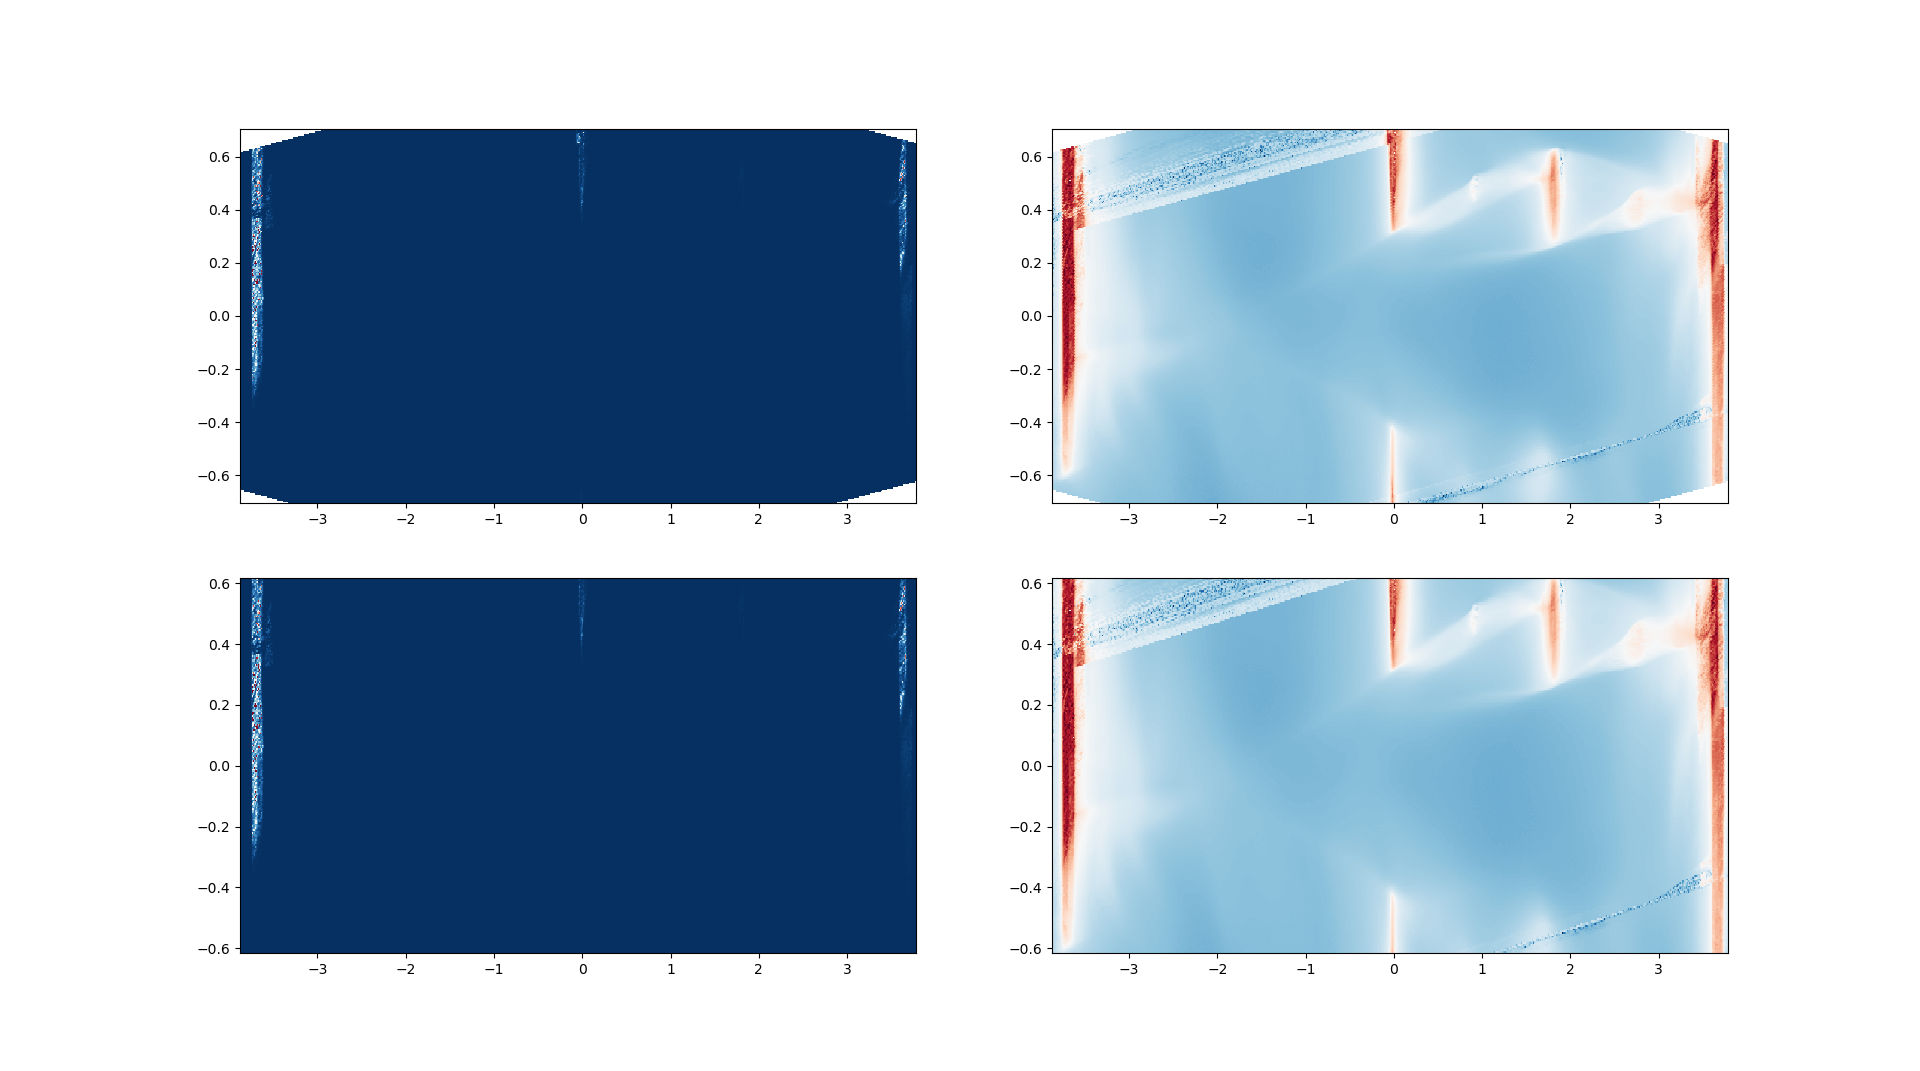

In [216]:
# Your Code Here
import pandas as pd

Nature=pd.read_excel('nature_20_electrical_switching_of_magnetic_order_in_an_orbital_Chern_insulator-fig1.xlsx')

<ipython-input-217-007c26750ec4>:9: RuntimeWarning: divide by zero encountered in log
  ax[0][1].pcolor(cm_2,D,np.log(R_xx),cmap='RdBu_r',shading = "auto")


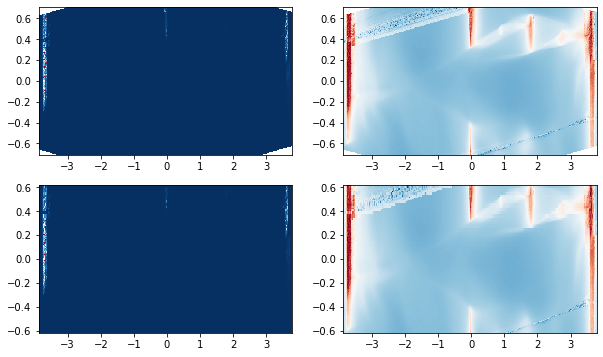

In [217]:
# import
import numpy as np
import matplotlib.pyplot as plt
cm_2 = np.array(Nature["n (10^12 cm^-2)"]).reshape(251,900)
D = np.array(Nature["D (V/nm)"]).reshape(251,900)
R_xx = np.array(Nature["R_xx (Ohm)"]).reshape(251,900)
fig,ax = plt.subplots(2,2,figsize = (10,6))
ax[0][0].pcolor(cm_2,D,R_xx,cmap='RdBu_r',shading = "auto")
ax[0][1].pcolor(cm_2,D,np.log(R_xx),cmap='RdBu_r',shading = "auto")
R_cleaning = pd.DataFrame(R_xx.copy())
R_cleaning = R_cleaning[~R_cleaning.isin([np.nan, np.inf, -np.inf]).any(1)]
cm_2_cleaning = pd.DataFrame(cm_2.copy()).loc[R_cleaning.index]
D_cleaning = pd.DataFrame(D.copy()).loc[R_cleaning.index]
ax[1][0].pcolor(cm_2_cleaning,D_cleaning,R_cleaning,cmap='RdBu_r',shading = "auto")
ax[1][1].pcolor(cm_2_cleaning,D_cleaning,np.log(R_cleaning),cmap='RdBu_r',shading = "auto")
for i in range(2):
    for j in range(2):
        ax[i][j].set_yticks(np.arange(-0.6,0.8,0.2))
plt.show()



3. Scrap the following CSV file to analyze students' study activities and analyze the two periods of study records in the Canvas.

https://gohkust-my.sharepoint.com/:x:/g/personal/liuming_ust_hk/EZy53kbAdzJCuve0LFGKyEEBZ0dAIFQmM3aaaG0t81zUWQ?e=sX0ucv
https://gohkust-my.sharepoint.com/:x:/g/personal/liuming_ust_hk/Ef0JtbbUQilMjP9UmYZaL4wBhQ9brdRgc7y1B9ZCsBm-aA?e=fF1dSW

        List the top ten students who spent the most time(times viewed) in the two periods, respectively.
        List the top ten students who have the most significant improvement of time(absolute value of times viewed) in the two periods.
        List top 3 content types and top 5 content names for times viewed in the two periods, respectively.
     
        (bonus: any reasonable insight from the data)
     
     


In [211]:
# Your Code Here
import pandas as pd
import numpy as np
Period1 = pd.read_excel('activity 2021-9-27 - .xlsx')
Period2 = pd.read_excel("activity 2021-11-4 - .xlsx")

### (1)List the top ten students who spent the most time(times viewed) in the two periods, respectively.

In [218]:
grouped1 = Period1.groupby("Student Number")
grouped2 = Period2.groupby("Student Number")
top_ten_time_period1 = grouped1["Times Viewed"].agg(np.sum).sort_values()[::-1][:10]
top_ten_time_period2 = grouped2["Times Viewed"].agg(np.sum).sort_values()[::-1][:10]
print("Top ten students who spent the most time in period 2021-9-27:")
Q1_re1 = list(top_ten_time_period1.index)
print(Q1_re1)
print()
Q1_re2 = list(top_ten_time_period2.index)
print("Top ten students who spent the most time in period 2021-11-4:")
print(Q1_re2)

Top ten students who spent the most time in period 2021-9-27:
[605, 1297, 1713, 593, 533, 125, 1757, 227, 1681, 59]

Top ten students who spent the most time in period 2021-11-4:
[1713, 1757, 1681, 125, 531, 457, 1915, 533, 227, 593]


### (2)List the top ten students who have the most significant improvement of time(absolute value of times viewed) in the two periods.

In [222]:
# l1 = len(Period1)
# l2 = len(Period2)
# # print(l1,l2)
a1 = grouped1["Times Viewed"].agg(np.sum).sort_index()
a2 = grouped2["Times Viewed"].agg(np.sum).sort_index()
top_ten_improved = (a2-a1).sort_values()[::-1][:10]
Q2_re = list(top_ten_improved.index)
print("Top ten students who have the most significant improvement of time")
print(Q2_re)

Top ten students who have the most significant improvement of time
[531, 1915, 1343, 321, 885, 357, 255, 1079, 711, 1405]


### (3)List top 3 content types and top 5 content names for times viewed in the two periods, respectively.

In [214]:
content_types_grouped1 = Period1.groupby("Content Type")
content_types_grouped2 = Period2.groupby("Content Type")
content_name_grouped1 = Period1.groupby("Content Name")
content_name_grouped2 = Period2.groupby("Content Name")

In [215]:
print("Top 3 content types for times viewed in period 2021-9-27")
print(list(content_types_grouped1["Times Viewed"].agg(np.sum).sort_values()[::-1][:3].index))
print()
print("Top 3 content types for times viewed in period 2021-11-4")
print(list(content_types_grouped2["Times Viewed"].agg(np.sum).sort_values()[::-1][:3].index))
print()
print("Top 5 content names for times viewed in period 2021-9-27")
print(list(content_name_grouped1["Times Viewed"].agg(np.sum).sort_values()[::-1][:5].index))
print()
print("Top 5 content names for times viewed in period 2021-11-4")
print(list(content_name_grouped2["Times Viewed"].agg(np.sum).sort_values()[::-1][:5].index))
print()

Top 3 content types for times viewed in period 2021-9-27
['course.home', 'course.files.file', 'course.assignments.assignment']

Top 3 content types for times viewed in period 2021-11-4
['course.home', 'course.files.file', 'course.assignments']

Top 5 content names for times viewed in period 2021-9-27
['Course Home', '寰\ue1bb俊鍥剧墖_20210923171742-1.png', 'Course Assignments', 'Assignment 2', 'Course Files']

Top 5 content names for times viewed in period 2021-11-4
['Course Home', 'Course Assignments', 'Course Files', 'Assignment 4', 'Course Grades']



### (4)some insight from the data.

In [226]:
print("Students who still in the top 10 after 2 months:",set(Q1_re1)-set(Q1_re2))

Students who still in the top 10 after 2 months: {1297, 59, 605}


**1. From the first problem, we can find that students in different periods may have different attitudes to study. There are only three students (59,605,1297) who still kept studying with the most time after two months, which also means that we could not judge a student by his/her first behaviour.**

In [229]:
print("Students who truly made progress")
print(top_ten_improved[top_ten_improved.values>0])

Students who truly made progress
Student Number
531     51
1915    29
1343     8
321      4
Name: Times Viewed, dtype: int64


**2. From the second problem, we can easily find that there are only 4 students who truly spend more time studying. This may because students had found other more important things to do, like starting to prepare for PHD application or apply for job, or they just became lazy.**

**3. The assignment of MSDM5002 was ASS2 in September and ASS4 in NOV. So, the reason why students spent less time may also be the fact that ASS4 is easier than ASS2 or that students had been familiar with python so as to spend less time finish the homework.**